In [174]:
import numpy as np
import pandas as pd
%matplotlib inline

In [175]:
"""Plik "dane" (dane dotyczące różnych krajów):
	- nation - kraj,
	- region - region świata,
	- fertility - współczynnik dzietności, liczba dzieci przypadających na kobietę,
	- ppgdp - produkt krajowy brutto per capita w dolarach amerykańskich,
	- lifeExpF - oczekiwana długość życia kobiet,
	- pctUrban - procent ludności miejskiej,
	- infantMortality - zgony niemowląt w wieku 1 roku na 1000 żywych urodzeń,
	- income - zmienna binarna 
    1 - gospodarki o wysokich i średnio-wysokich dochodach,
	0 - gospodarki o niskich i średnio-niskich dochodach).
"""

'Plik "dane" (dane dotyczące różnych krajów):\n\t- nation - kraj,\n\t- region - region świata,\n\t- fertility - współczynnik dzietności, liczba dzieci przypadających na kobietę,\n\t- ppgdp - produkt krajowy brutto per capita w dolarach amerykańskich,\n\t- lifeExpF - oczekiwana długość życia kobiet,\n\t- pctUrban - procent ludności miejskiej,\n\t- infantMortality - zgony niemowląt w wieku 1 roku na 1000 żywych urodzeń,\n\t- income - zmienna binarna \n    1 - gospodarki o wysokich i średnio-wysokich dochodach,\n\t0 - gospodarki o niskich i średnio-niskich dochodach).\n'

In [176]:
dane = pd.read_csv('dane.csv',encoding='utf-8',sep=";")
dane.head()

,nation,region,fertility,ppgdp,lifeExpF,pctUrban,infantMortality,income
0,Afghanistan,Asia,"5,968",499,"49,49",23,"124,535",0
1,Albania,Europe,"1,525","3677,2","80,4",53,"16,561",1
2,Algeria,Africa,"2,142",4473,75,67,"21,458",0
3,Angola,Africa,"5,135","4321,9","53,17",59,"96,191",0
4,Anguilla,Other,2,"13750,1","81,1",100,"54,264",0


In [177]:
dane[dane["nation"] == "Poland"]

,nation,region,fertility,ppgdp,lifeExpF,pctUrban,infantMortality,income
144,Poland,Europe,"1,415","12263,2","80,56",61,"5,546",1


In [178]:
def fix_commas(data,colidx):
    cols = list(data.columns)
    data = np.array(data)
    nrows = data.shape[0]
    for column in colidx:
        for row in np.arange(nrows):
            data[row,column] = data[row,column].replace(",",".")
    return pd.DataFrame(data,columns=cols)

In [179]:
dane = fix_commas(dane,[2,3,4,6])
dane_ = dane[["fertility","ppgdp","lifeExpF","pctUrban","infantMortality",'income']].astype(float)
cv = dane_.std(numeric_only=True)/dane_.mean(numeric_only=True) # coefficient of variation
cv = cv.to_frame()
cv.columns = ['coefficient of variation cv']
pd.concat([dane_.describe(),cv.T])

,fertility,ppgdp,lifeExpF,pctUrban,infantMortality,income
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2.761383,13011.951759,72.293193,57.929648,31.233331,0.582915
std,1.339589,18412.443368,10.123784,23.429565,29.093024,0.494321
min,1.134000,114.800000,48.110000,11.000000,1.916000,0.000000
25%,1.753500,1282.950000,65.660000,39.000000,7.648000,0.000000
50%,2.262000,4684.500000,75.890000,59.000000,19.848000,1.000000
75%,3.544500,15520.500000,79.585000,75.000000,47.701000,1.000000
max,6.925000,105095.400000,87.120000,100.000000,124.535000,1.000000
coefficient of variation cv,0.485115,1.415041,0.140038,0.404449,0.931474,0.848016


    lifeExpF  pctUrban  infantMortality
0  49.490002      23.0       124.535004
1  80.400002      53.0        16.561001
2  75.000000      67.0        21.458000
3  53.169998      59.0        96.191002
4  81.099998     100.0        54.264000


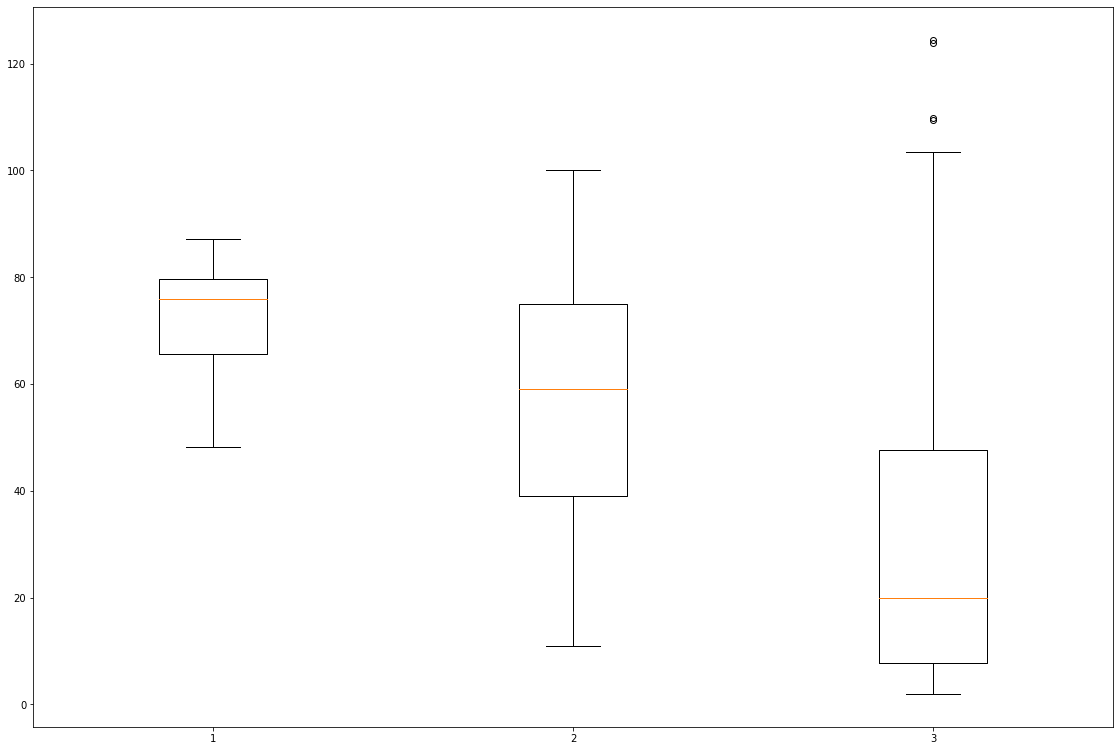

In [180]:
import matplotlib.pyplot as plt
data_ = dane_.astype(np.float32)

fig = plt.figure(figsize =(15, 10))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

data_ = data_.drop(["ppgdp","fertility","income"],axis=1)
print(data_.head())
# Creating plot
bp = ax.boxplot(data_)
 
# show plot
plt.show()

In [181]:
#dane = dane[['POWIAT','DOCH','LUDN','PROD','WYN','BEZR','MIESZ','ZIEL']]
#dane_ = dane_.drop('ROW',axis=1)

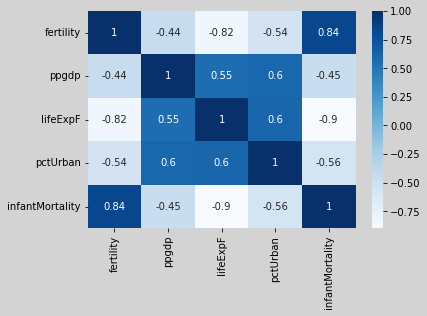

In [182]:
import seaborn as sb
import matplotlib.pyplot as plt

corrMatrix = dane_[["fertility","ppgdp","lifeExpF","pctUrban","infantMortality"]].corr()
plt.figure(facecolor='lightgrey')
sb.heatmap(corrMatrix,annot=True, cmap="Blues")
plt.show()


In [183]:
#Porządkowanie liniowe  
dane_eur = dane[dane["region"] == 'Europe']
countries = np.array(dane_eur["nation"])
data = dane_eur[["fertility","ppgdp","lifeExpF","pctUrban","infantMortality"]]
data = np.array(data,dtype=np.float32)

#destimulants
data[:,4] *= (-1) # infant mortality

#nominants
n_fert = 3 # 3 kids is an optimal quantity

data[:,0] = [1/(i-n_fert+1) if i > n_fert else -1/(i-n_fert-1) if i<n_fert else 1 for i in data[:,0]]
##standarize 
for i in np.arange(5):
    data[:,i] = (data[:,i] - np.mean(data[:,i], axis=0)) /np.std(data[:,i], axis=0)
data = np.concatenate((countries[:,np.newaxis],data), axis=1)

In [184]:
######## Porządkowanie Liniowe ############

# Metoda hellwiga  

data_hell = data.copy()

wzorzec = np.max(data_hell[:,1:5],axis=0)
#w1 = np.max(data_hell[:,1:5],axis=0)
#w2 = np.array(np.min(data_hell[:,5],axis=0)) # bezrobocie
#w2.shape = (1,)
#w3 = np.max(data_hell[:,6:8],axis=0)
#wzorzec = np.concatenate([w1,w2,w3],axis=0)

data_hell[:,1:5] = np.power(np.subtract(data_hell[:,1:5],wzorzec) , 2)

distance = np.sum(data_hell[:,1:5],axis=1)
distance = np.sqrt(distance.astype(np.float64))
data_hell= np.insert(data_hell,6,distance,axis=1)
d0 = np.mean(distance) + 2*np.std(distance) # Possibly far distance

data_hell[:,6] = 1 - data_hell[:,-1]/d0
data_hell = data_hell[data_hell[:,-1].argsort()[::-1]]
result = pd.DataFrame(data_hell, columns=["Country","d1","d2","d3","d4","d5","Zmienna Syntetyczna"])
result[["Country","Zmienna Syntetyczna"]]

,Country,Zmienna Syntetyczna
0,Norway,0.765283
1,Luxembourg,0.687974
2,Sweden,0.650148
3,Denmark,0.649164
4,Iceland,0.644582
5,France,0.624662
6,Finland,0.614804
7,Belgium,0.61405
8,Netherlands,0.591412
9,United Kingdom,0.553185


In [185]:
############ Cluster analysis ###############

dane_eur = dane[dane["region"] == 'Europe']
countries = np.array(dane_eur["nation"])
data = dane_eur[["fertility","ppgdp","lifeExpF","pctUrban","infantMortality"]]
data = np.array(data,dtype=np.float32)


#data = np.concatenate((powiaty[:,np.newaxis],data), axis=1)


In [186]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data = pd.DataFrame(data,index=countries,columns=[["fertility","ppgdp","lifeExpF","pctUrban","infantMortality"]])
X = pd.DataFrame(sc.fit_transform(data), index=data.index, columns=data.columns)
X.head()

,fertility,ppgdp,lifeExpF,pctUrban,infantMortality
Albania,-0.284989,-1.008684,-0.094425,-1.348454,2.787791
Austria,-1.069495,0.755548,0.928520,-0.190090,-0.643252
Belarus,-0.486594,-0.922569,-1.403145,0.350479,0.099411
Belgium,1.073653,0.698387,0.688208,2.049412,-0.636309
Bosnia and Herzegovina,-1.998631,-0.974639,-0.743914,-1.657351,1.755380


In [187]:
#loading vectors for murder assult rape i.e. these are the projection of the data onto the principal components
pca_components = pd.DataFrame(PCA(n_components=2).fit(X).components_.T,index=X.columns,columns=["V1","V2"])
pca_loadings = pca_components
pca_components

,V1,V2
fertility,-0.391581,-0.683565
ppgdp,-0.475025,0.103482
lifeExpF,-0.459765,0.492456
pctUrban,-0.429774,-0.399947
infantMortality,0.474263,-0.345774


In [188]:
# fit the PCA model and transform X to get the principal components
X = pd.DataFrame(sc.fit_transform(data), index=data.index, columns=data.columns)
pca = PCA(n_components=2)
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'], index=X.index)
df_plot

,PC1,PC2
Albania,2.535836,-0.380707
Austria,-0.590386,1.564956
Belarus,1.170421,-0.628385
Belgium,-2.251150,-0.922367
Bosnia and Herzegovina,3.132428,0.954880
Bulgaria,1.365887,-0.858750
Croatia,0.818756,0.591405
Czech Republic,-0.233736,0.457756
Denmark,-2.010654,-0.956870
Estonia,-0.018727,-0.337380


<Figure size 432x288 with 0 Axes>

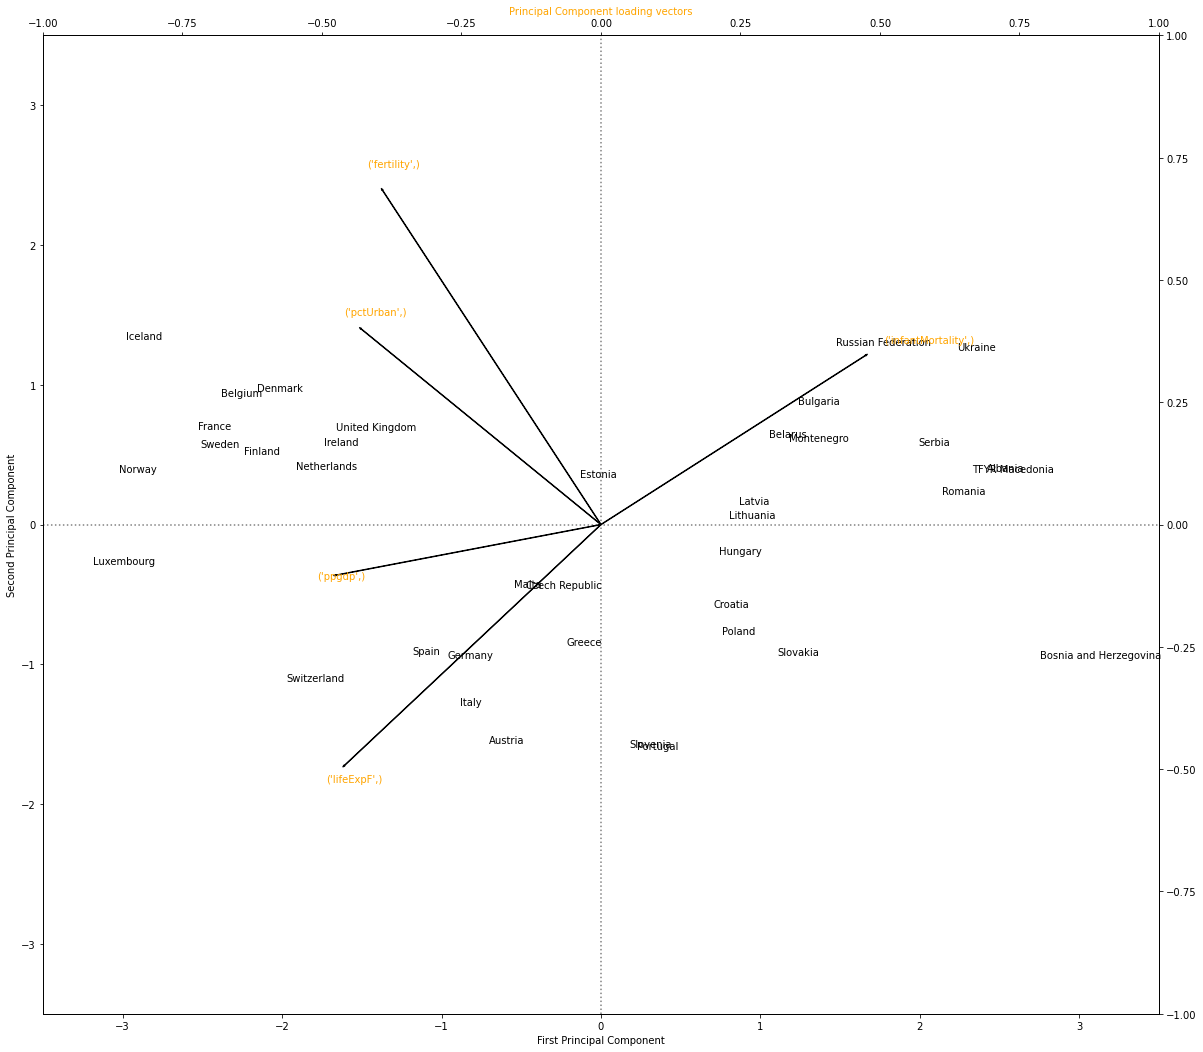

In [189]:
plt.figure(facecolor='white')
fig , p2 = plt.subplots(figsize=(20,18))
p2.set_xlim(-3.5,3.5)
p2.set_ylim(-3.5,3.5)

# plot Principal Components 1 and 2
for i in df_plot.index:
    p2.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# plot reference lines
p2.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
p2.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

p2.set_xlabel('First Principal Component')
p2.set_ylabel('Second Principal Component')
    
# plot Principal Component loading vectors, using a second y-axis.
p3 = p2.twinx().twiny() 

p3.set_ylim(-1,1)
p3.set_xlim(-1,1)
p3.tick_params(axis='y', colors='orange')
p3.set_xlabel('Principal Component loading vectors', color='orange')

# plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    p3.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# plot vectors
p3.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
p3.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
p3.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
p3.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
p3.arrow(0,0,pca_loadings.V1[4], -pca_loadings.V2[4])

plt.show()

In [190]:
#from matplotlib.pyplot import axis
#
#dane_eur = dane[dane["region"] == 'Europe']
#countries = np.array(dane_eur["nation"])
#data = dane_eur[["fertility","ppgdp","lifeExpF","pctUrban","infantMortality"]]
#data = np.array(data,dtype=np.float32)
#
###Standardizing
#for i in np.arange(5):
#    data[:,i] = (data[:,i] - np.mean(data[:,i], axis=0)) /np.std(data[:,i], axis=0)
##    
##Removing outliers
#old_s = data.shape[0]
#del_rows = np.where(np.abs(data[:,1:]) > 3)[0]
#data = np.delete(data,del_rows, axis=0)
#countries = np.delete(countries,del_rows,axis=0)
#print(f'{old_s - data.shape[0]} rows have been removed due to outliers')
#
##Standardizing
#for i in np.arange(5):
#    data[:,i] = (data[:,i] - np.mean(data[:,i], axis=0)) /np.std(data[:,i], axis=0)
## all cv > 0.1 and all |p| < 0.

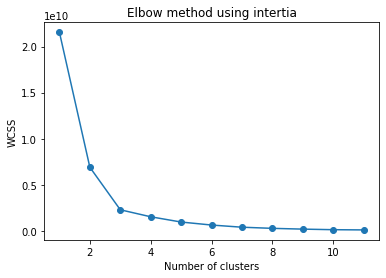

KMeans(n_clusters=11)


In [191]:
from sklearn.cluster import KMeans

wcss = [] # the sum of the squared distance between each member of the cluster and its centroid.
for i in range(1,12):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(facecolor='white')
plt.plot(range(1,12),wcss, marker='o')
plt.title('Elbow method using intertia')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.ylim(0,500)
plt.show() 
print(kmeans)
#Optimal number of clusters => nc = 4

In [192]:
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(data)
km_labels = kmeans.labels_

In [193]:
grouping = pd.DataFrame(km_labels,countries, columns=["Cluster"])
grouping.sort_values("Cluster")

,Cluster
United Kingdom,0
Austria,0
Ireland,0
Belgium,0
Sweden,0
Iceland,0
Netherlands,0
Denmark,0
Germany,0
Finland,0


[0.99999976 0.99999994 0.99999994]


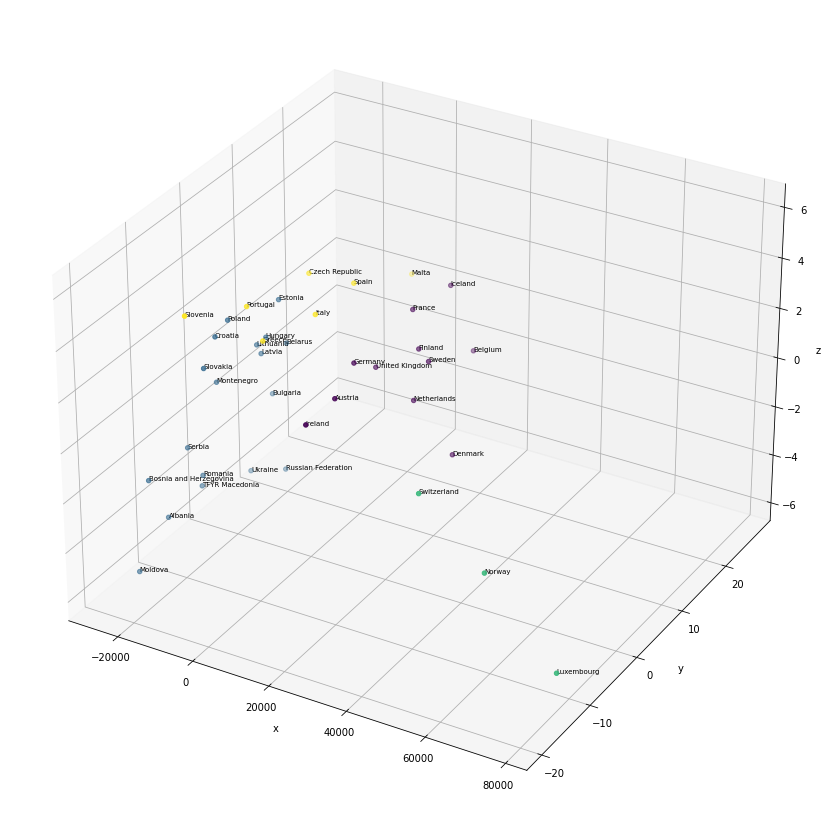

In [194]:
################# Visualization of Kmeans #################
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure
from sklearn.decomposition import PCA
#%matplotlib        =>     show in separate window
#%matplotlib inline =>     inline show in console window
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

#First 3 dimensions explain ~99% of our data

pca = PCA(n_components=3)
pcs = pca.fit_transform(data)
print(pca.explained_variance_ratio_.cumsum()[2])
ax.scatter(pcs[:,0],pcs[:,1],pcs[:,2],c=km_labels) 
for i in range(len(pcs)): 
    ax.text(pcs[i,0],pcs[i,1],pcs[i,2],  '%s' % (str(countries[i])), size=7, zorder=1,  
    c='black') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


In [195]:
x = dane_eur[['fertility',"ppgdp","lifeExpF","pctUrban","infantMortality"]]
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
da = pd.DataFrame(x_scaled,columns=x.columns)
da["clusters"] = np.array(grouping["Cluster"])
da.index = dane_eur["nation"]
da.head()

,fertility,ppgdp,lifeExpF,pctUrban,infantMortality,clusters
nation,,,,,,
Albania,-0.284989,-1.008684,-0.094426,-1.348454,2.787790,1
Austria,-1.069495,0.755548,0.928519,-0.190090,-0.643252,0
Belarus,-0.486594,-0.922569,-1.403146,0.350479,0.099411,1
Belgium,1.073653,0.698387,0.688208,2.049413,-0.636309,0
Bosnia and Herzegovina,-1.998631,-0.974639,-0.743915,-1.657351,1.755380,1


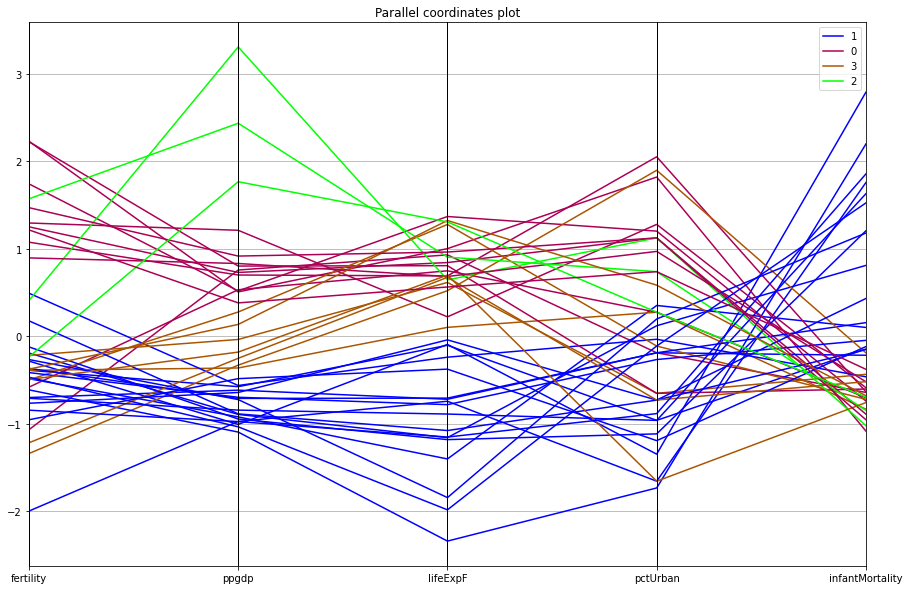

In [196]:
plt.figure(facecolor='white',figsize=(15,10))
pd.plotting.parallel_coordinates(da,'clusters',colormap="brg")
plt.title('Parallel coordinates plot')
plt.show() 

In [197]:
################ Part II Prediction ################
dane.head()


,nation,region,fertility,ppgdp,lifeExpF,pctUrban,infantMortality,income
0,Afghanistan,Asia,5.968,499,49.49,23,124.535,0
1,Albania,Europe,1.525,3677.2,80.4,53,16.561,1
2,Algeria,Africa,2.142,4473,75,67,21.458,0
3,Angola,Africa,5.135,4321.9,53.17,59,96.191,0
4,Anguilla,Other,2,13750.1,81.1,100,54.264,0


In [198]:
                                ### Preparing data ###

In [199]:
#Function changes cathegorical data to binary data (when cathegorical data is not 'orderable')
#column_name -> string
def cathegorical_to_bin(pandas_data_frame,column_name):
    value_names = pd.unique(pandas_data_frame[column_name])
    tmp = np.ones(shape=(pandas_data_frame.shape[0],len(value_names)))    # < ) 
    tmp = pd.DataFrame(tmp, columns=value_names)
    for name in value_names:
        tmp[name] = np.int16(np.array(dane[column_name]==name))
    return tmp
cathegorical_to_bin(dane,"region")


,Asia,Europe,Africa,Other,Latin Amer
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
194,0,0,0,0,1
195,1,0,0,0,0
196,1,0,0,0,0
197,0,0,1,0,0


In [200]:
data = dane[["income","fertility","ppgdp","lifeExpF","pctUrban","infantMortality"]]
data = pd.concat([data,cathegorical_to_bin(dane,"region")],axis=1)

In [201]:
########## Logistic Regression ############

# logit i zmienne obasniajace powinny byc zalezne liniowo
# y -> binary
# xi,xj

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_names = np.array(data.columns[1:len(data.columns)])
y_name = str(data.columns[0])
x_names,y_name
#
x_train, x_test, y_train,y_test = train_test_split(data[x_names],data[y_name] ,test_size=0.25, random_state=0)
#
y_train = y_train.astype('int')
y_test = y_test.astype('int')



In [203]:
x_train

,fertility,ppgdp,lifeExpF,pctUrban,infantMortality,Asia,Europe,Africa,Other,Latin Amer
71,2.217,35292.7,71.6,84,8.765,0,0,0,1,0
196,4.938,1437.2,67.66,32,44.412,1,0,0,0,0
86,2.097,46220.3,83.17,62,3.859,0,1,0,0,0
96,2.621,865.4,72.36,35,32.765,1,0,0,0,0
149,1.428,7522.4,77.95,58,12.216,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
67,1.528,2680.3,77.31,53,25.585,1,0,0,0,0
192,2.264,1427.3,71.9,36,44.481,1,0,0,0,0
117,1.45,1625.8,73.48,48,14.344,0,1,0,0,0
47,1.501,18838.8,81,74,2.997,0,1,0,0,0


In [204]:
x_train.astype(np.float64)

,fertility,ppgdp,lifeExpF,pctUrban,infantMortality,Asia,Europe,Africa,Other,Latin Amer
71,2.217,35292.7,71.60,84.0,8.765,0.0,0.0,0.0,1.0,0.0
196,4.938,1437.2,67.66,32.0,44.412,1.0,0.0,0.0,0.0,0.0
86,2.097,46220.3,83.17,62.0,3.859,0.0,1.0,0.0,0.0,0.0
96,2.621,865.4,72.36,35.0,32.765,1.0,0.0,0.0,0.0,0.0
149,1.428,7522.4,77.95,58.0,12.216,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
67,1.528,2680.3,77.31,53.0,25.585,1.0,0.0,0.0,0.0,0.0
192,2.264,1427.3,71.90,36.0,44.481,1.0,0.0,0.0,0.0,0.0
117,1.450,1625.8,73.48,48.0,14.344,0.0,1.0,0.0,0.0,0.0
47,1.501,18838.8,81.00,74.0,2.997,0.0,1.0,0.0,0.0,0.0


In [205]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1])

<AxesSubplot: >

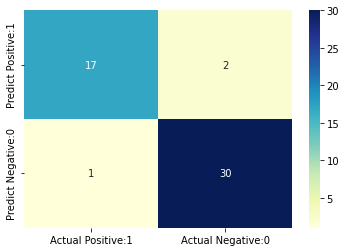

In [206]:
from sklearn import metrics 
from seaborn import heatmap
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(facecolor="white")
heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
#   TP  FP  
#   FN  TN

In [207]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
TP, FP , FN , TN = conf_matrix[0,0],conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]

# jaka część zbioru testowego
# została prawidłowo przypisana
acc = (TP+TN)/(TP+FP+FN+TN)

# w jakiej części klasa pozytywna została
# pokryta przewidywaniem pozytywnym.
sensivity = TP/(TP+FN) #tpr

# jakiej części klasa negatywna jest 
# pokryta prognozą negatywną.
specificity = TN/(TN+FP) #fpr
acc,sensivity, specificity

(0.94, 0.9444444444444444, 0.9375)

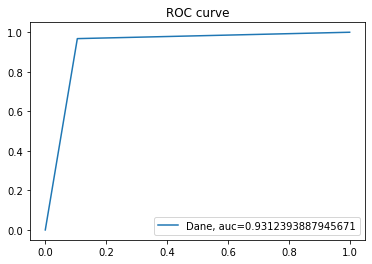

In [208]:
y_pred_proba = model.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(facecolor='white')
plt.plot(fpr,tpr,label="Dane, auc="+str(auc))
plt.title("ROC curve")
plt.legend()
plt.show()

In [209]:
model.score(x_train,y_train),model.score(x_test,y_test)

(0.912751677852349, 0.94)

In [210]:
model.coef_

array([[ 5.23727608e-02,  4.72548910e-04, -1.35113927e-02,
         6.35651432e-03, -4.66285014e-02, -3.34241507e-01,
         4.67928775e-01, -7.27490352e-01,  3.32364977e-01,
         2.78108121e-01]])

In [211]:
tmp1 = x_train.describe().copy() 
tmp2 = x_test.describe().copy()
tmp1 - tmp2

,Asia,Europe,Africa,Other,Latin Amer
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.015034,-0.005369,-0.018255,-0.072215,0.080805
std,0.005931,-0.006809,-0.012490,-0.056483,0.129051
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000


In [212]:
tmp3 = y_train.describe().copy() 
tmp4 = y_test.describe().copy()
tmp3- tmp4

count    99.000000
mean     -0.049530
std       0.006364
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.000000
Name: income, dtype: float64

In [213]:
######## LDA ########
#testing if we can perform it
#multivariate normality 
import scipy
from scipy import stats
"""    hz:he Henze-Zirkler test statistic.
    pval:P-value.
    normal: True if X comes from a multivariate normal distribution."""

from pingouin import multivariate_normality
data_tmp = dane[["fertility","ppgdp","lifeExpF","pctUrban","infantMortality"]]
data_tmp = data_tmp.astype(np.float32)

print(multivariate_normality(data_tmp, alpha=.05))


HZResults(hz=5.065905088142934, pval=1.181606286073005e-128, normal=False)


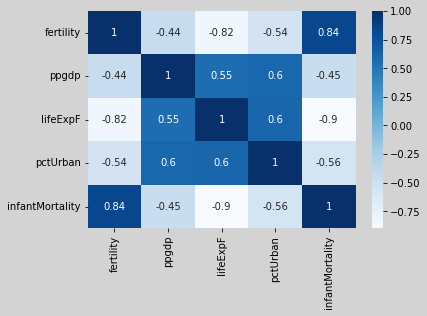

In [214]:
#Istnieje współliniowość pomiędzy fertility a infantMortality
corrMatrix = dane_[["fertility","ppgdp","lifeExpF","pctUrban","infantMortality"]].corr()
plt.figure(facecolor='lightgrey')
sb.heatmap(corrMatrix,annot=True, cmap="Blues")
plt.show()

In [215]:
#########   KNN   ##########
cols = data_tmp.columns

for col in cols:
    data_tmp[col] = stats.zscore(data_tmp[col])
data_tmp.head()


,fertility,ppgdp,lifeExpF,pctUrban,infantMortality
0,2.399768,-0.681306,-2.258119,-1.494596,3.215100
1,-0.925285,-0.508259,0.802788,-0.210934,-0.505597
2,-0.463534,-0.464929,0.268045,0.388109,-0.336850
3,1.776368,-0.473157,-1.893702,0.045799,2.238389
4,-0.569804,0.040191,0.872106,1.800138,0.793618


In [216]:
x_train, x_test, y_train, y_test = train_test_split(data_tmp,dane["income"], test_size=0.25)


In [217]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_best = 10000000
best_k = 0
best_model = KNeighborsRegressor(20)

for k in range(1,10):
    model_ = KNeighborsRegressor(n_neighbors=k)
    model_.fit(x_train, y_train)
    y_pred = model_.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse_t = (mse)**(1/2)
    if rmse_best > rmse_t:
        rmse_best = rmse_t
        best_k = k
        best_model = model_
        ypred = y_pred
        
print(best_k, rmse_best, best_model)
 


6 0.3374742788552765 KNeighborsRegressor(n_neighbors=6)


<AxesSubplot: >

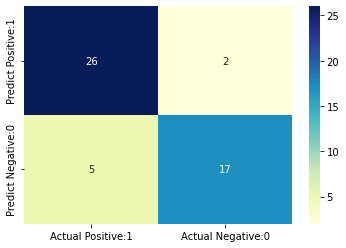

In [218]:
model = KNeighborsRegressor(2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test.astype(np.int16), y_pred.astype(np.int16))
conf_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(facecolor="white")
heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
#   TP  FP  
#   FN  TN

In [219]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')
y_pred = np.array(y_pred,dtype=np.int32)

In [220]:

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
TP, FP , FN , TN = conf_matrix[0,0],conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]

# jaka część zbioru testowego
# została prawidłowo przypisana
acc = (TP+TN)/(TP+FP+FN+TN)

# w jakiej części klasa pozytywna została
# pokryta przewidywaniem pozytywnym.
sensivity = TP/(TP+FN) #tpr

# jakiej części klasa negatywna jest 
# pokryta prognozą negatywną.
specificity = TN/(TN+FP) #fpr
acc,sensivity, specificity
TP, FP , FN , TN = conf_matrix[0,0],conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]

# jaka część zbioru testowego
# została prawidłowo przypisana
acc = (TP+TN)/(TP+FP+FN+TN)

# w jakiej części klasa pozytywna została
# pokryta przewidywaniem pozytywnym.
sensivity = TP/(TP+FN) #tpr

# jakiej części klasa negatywna jest 
# pokryta prognozą negatywną.
specificity = TN/(TN+FP) #fpr
acc,sensivity, specificity

(0.86, 0.8387096774193549, 0.8947368421052632)

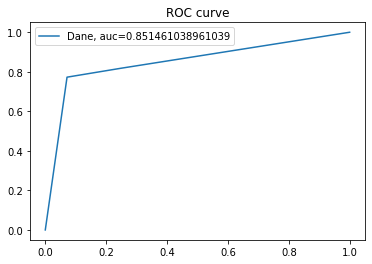

In [221]:
y_pred_proba = model.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(facecolor='white')
plt.plot(fpr,tpr,label="Dane, auc="+str(auc))
plt.title("ROC curve")
plt.legend()
plt.show()